In [2]:
from turkish_morphology import decompose, analyze

word = "kitaplarımızdaki"
word = "yapamadıklarımızdan"
sentence = "Yazarın kitaplarını yayın hakkını elinde bulunduran Aziz Nesin Vakfı'ndan yapılan açıklamaya göre,ilki 1946 yılında basılan Aziz Nesin'in kitapları, o dönemden bu yana 10 milyon 780 bin adet basıldı ve dağıtıldı"
word = "dersindeyim"

analyses = analyze.surface_form(word, use_proper_feature=False)
decomposition = decompose.human_readable_analysis(analyses[0])

analyses
# decomposition

['(de[VB]+[Polarity=Pos])([VN]-r[Derivation=AorNom]+[PersonNumber=A3sg]+[Possessive=Pnon]+[Case=Bare])([NOMP]-sH[Derivation=Sim]+[PersonNumber=A3sg]+Hn[Possessive=P2sg]+NDA[Case=Loc]+[Copula=PresCop]+YHm[PersonNumber=V1sg])',
 '(ders[NOMP]+[PersonNumber=A3sg]+Hn[Possessive=P2sg]+NDA[Case=Loc]+[Copula=PresCop]+YHm[PersonNumber=V1sg])',
 '(ders[NOMP]+[PersonNumber=A3sg]+SH[Possessive=P3sg]+NDA[Case=Loc]+[Copula=PresCop]+YHm[PersonNumber=V1sg])']

In [3]:
from morphology import decompose_tr

decomposition = decompose_tr(word)
decomposition

[Decomposition(root=ders, pos=NOMP, meta_morphemes=['SH', 'NDA', 'YHm'], morphemes=['i', 'nde', 'yim']),
 Decomposition(root=ders, pos=NOMP, meta_morphemes=['Hn', 'NDA', 'YHm'], morphemes=['in', 'de', 'yim']),
 Decomposition(root=de, pos=NOMP, meta_morphemes=['r', 'sH', 'Hn', 'NDA', 'YHm'], morphemes=['r', 'si', 'n', 'de', 'yim']),
 Decomposition(root=de, pos=NOMP, meta_morphemes=['r', 'sH', 'Hn', 'NDA', 'YHm'], morphemes=['r', 'si', 'n', 'de', 'yim'])]

In [ ]:
import pandas as pd

data = pd.read_csv("data/bilkent-turkish-writings/bilkent-turkish-writings-dataset.csv")
data.head()

In [ ]:
import re
from utils import write_json

essays = []

for i, row in data.iterrows():
    if isinstance(row["text"], str):
        raw_texts = re.split("[.?!]\s",row["text"].replace("\r\n", ""))
        texts = []

        for text in raw_texts:
            texts.extend(re.split("\s\s\s\s", text))

        texts = [re.sub("^[A-ZÜÖĞIŞÇİ0-9\-\s.]+$", "", text) for text in texts]
        texts = [re.sub("\s+", " ", text).strip() for text in texts if all(["http" not in text.lower(), "kaynakça" not in text.lower()]) and len(text.strip().split()) > 5]
        
        if len(texts) > 1:
            essays.append({
                "id": f"bilkent-turkish-writings-{i}",
                "sentences": texts
            })

write_json(essays, "data/bilkent-turkish-writings/bilkent-turkish-writings-dataset.json", ensure_ascii=False)


In [ ]:
from morphology import decompose_tr

# decompose_tr("heykelciklerinin")
[decomposition.to_json() for decomposition in decompose_tr("yansıttığımızın")]

In [ ]:
from utils import read_json

data = read_json("../data/bilkent-turkish-writings/bilkent-turkish-writings-dataset_prep.json")

In [ ]:
len(data), sum([len(val) for val in data.values()])

In [ ]:
sum([1 for root, word_map in data.items() for word, decompositions in word_map.items() if len(decompositions) == 1 and decompositions[0]["morphemes"]])

In [ ]:
from utils import write_json
import pathlib

pathlib.Path("../data/bilkent-turkish-writings/batches").mkdir(parents=True, exist_ok=True)
i = 0
while True:
    data_chunk = list(data.items())[i*500:(i+1)*500]
    if data_chunk:
        write_json(dict(data_chunk), f"../data/bilkent-turkish-writings/batches/bilkent-turkish-writings-dataset_prep_{i}.json", ensure_ascii=False)
        i += 1
    else:
        break

In [1]:
from utils import write_json
from prepare_data_for_morph import post_morph_process

new_data = post_morph_process("../data/bilkent-turkish-writings/batches/bilkent-turkish-writings-dataset_prep_0.json")

write_json(new_data, "../data/bilkent-turkish-writings/batches/bilkent-turkish-writings-dataset_prep_0_new.json", ensure_ascii=False)

In [2]:
from src.utils import read_json, write_json

data = read_json("../data/bilkent-turkish-writings/btwd_prep.json")

output_data = {
    "metadata": {
        "source": "../data/bilkent-turkish-writings/btwd.json",
        "processor": "tr_btwd_prep",
        "language": "tr"
    },
    "data": data
}
write_json(output_data, "../data/bilkent-turkish-writings/btwd_prep.json", ensure_ascii=False)

In [ ]:
from src.utils import read_json, write_json

data = read_json("outputs/gpt-3.5/tr/btwd/btwd_prep_post_morph_sample_llm_morph_gen_en_one_shot_gpt-3.5-turbo_2094783b7ba0.json")
write_json(data, "outputs/gpt-3.5/tr/btwd/btwd_prep_post_morph_sample_llm_morph_gen_en_one_shot_gpt-3.5-turbo_2094783b7ba0.json", ensure_ascii=False)

In [3]:
import pandas as pd

data = pd.read_excel("../data/MorphoLEX_en.xlsx", sheet_name="0-1-2")

/Users/mismayil/.pyenv/versions/3.9.7/envs/til/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
data.head()

,ELP_ItemID,Word,POS,Nmorph,PRS_signature,MorphoLexSegm,ROOT1_PFMF,ROOT1_FamSize,ROOT1_Freq_HAL,SUFF1_PFMF,...,SUFF1_Freq_HAL,SUFF1_length,SUFF1_P,SUFF1_P*,SUFF2_PFMF,SUFF2_FamSize,SUFF2_Freq_HAL,SUFF2_length,SUFF2_P,SUFF2_P*
0,4,algebraical,JJ,3,"0,1,2",{(algebra)}>ic>>al>,100.0,4,3692,88.450148,...,1472797,2,0.000028,0.006334,91.538462,1431,4704731,2,0.000009,0.006643
1,61,allowably,RB,3,"0,1,2",{(allow)}>able>>y>,100.0,5,185956,88.978186,...,1227992,4,0.000032,0.006025,73.641851,2486,3870233,1,0.000050,0.029816
2,69,allusively,RB,3,"0,1,2",{(allude)}>ive>>ly>,100.0,4,2066,92.746114,...,1037354,3,0.000017,0.002781,80.980324,2898,3857999,2,0.000045,0.026726
3,94,alphabetically,RB,3,"0,1,2",{(alphabet)}>al>>ly>,50.0,5,6877,30.279720,...,4704731,2,0.000009,0.006643,13.496721,2898,3857999,2,0.000045,0.026726
4,116,altercations,NN,3,"0,1,2",{(alterc)>ate>}>ion>,0.0,2,187,56.623932,...,2569118,3,0.000026,0.010505,58.322904,1599,6530204,3,0.000009,0.009115


In [6]:
words = []

for i, row in data.iterrows():
    word = row["Word"]
    segmentation = row["MorphoLexSegm"]
    morphemes = re.findall(r"[A-Za-z]+", segmentation)
    if word == "".join(morphemes):
        words.append({
            "word": word,
            "morphemes": morphemes
        })

In [8]:
words[:10]

[{'word': 'algebraical', 'morphemes': ['algebra', 'ic', 'al']},
 {'word': 'altruistic', 'morphemes': ['altru', 'ist', 'ic']},
 {'word': 'amateurishly', 'morphemes': ['amateur', 'ish', 'ly']},
 {'word': 'ambassadorship', 'morphemes': ['ambassad', 'or', 'ship']},
 {'word': 'ambitiousness', 'morphemes': ['ambit', 'ious', 'ness']},
 {'word': 'woodenly', 'morphemes': ['wood', 'en', 'ly']},
 {'word': 'woodenness', 'morphemes': ['wood', 'en', 'ness']},
 {'word': 'wordlessly', 'morphemes': ['word', 'less', 'ly']},
 {'word': 'workableness', 'morphemes': ['work', 'able', 'ness']},
 {'word': 'worthlessly', 'morphemes': ['worth', 'less', 'ly']}]

In [5]:
import re

s = "{(algebra)}>ic>>al>"
matches = re.findall(r"[A-Za-z]+", s)
print(matches)

['algebra', 'ic', 'al']


In [3]:
from src.utils import read_json, write_json

data = read_json("experiments/data/en/morpholex/MorphoLEX_en_prep_morph_sample_nonce.json")

for i, sample in enumerate(data["data"]):
    sample["id"] = f"morpholex-ood-{i}"

write_json(data, "experiments/data/en/morpholex/MorphoLEX_en_prep_morph_sample_nonce.json", ensure_ascii=False)

In [1]:
from src.utils import read_json, write_json

data = read_json("experiments/data/tr/btwd/btwd_prep_post_comp_morph_sample_nonce.json")

for i, sample in enumerate(data["data"]):
    sample["id"] = f"tr-ood-{i}"

write_json(data, "experiments/data/tr/btwd/btwd_prep_post_comp_morph_sample_nonce.json", ensure_ascii=False)

In [10]:
import networkx as nx

G = nx.MultiDiGraph()
G.add_node("gel", id=1, root=True)
G.add_node("yap", id=2, root=True)
G.add_node("DH", id=3)
G.add_node("lAr", id=4)
G.add_node("mHs", id=5)

In [11]:
G.add_edges_from([("gel", "DH", {"route": "1-3"}), ("DH", "lAr", {"route": "1-3-4"}), ("yap", "DH", {"route": "2-3"}), ("yap", "mHs", {"route": "2-5"}), ("mHs", "lAr", {"route": "2-5-4"})])

[0, 0, 0, 0, 0]

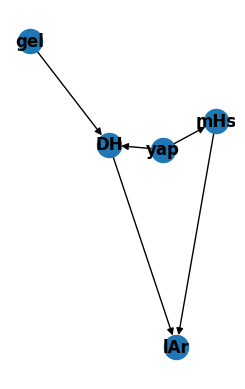

In [12]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
# subax2 = plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [13]:
roots = [node for node, data in G.nodes(data=True) if data.get("root")]

In [15]:
roots[0].neighbors()

AttributeError: 'str' object has no attribute 'neighbors'

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from datasets import load_dataset

data_dir = "/mnt/nlpdata1/share/datasets/allenai___c4/tr/0.0.0/1588ec454efa1a09f29cd18ddd04fe05fc8653a2"
data_file = "c4-train-00049-of-00545.arrow"
data = load_dataset(data_dir, data_files=data_file, streaming=True)

In [3]:
data

IterableDatasetDict({
    train: IterableDataset({
        features: ['text', 'timestamp', 'url'],
        n_shards: 1
    })
})

In [7]:
data_iter = iter(data["train"])
sample = next(data_iter)

In [6]:
sample

{'text': 'Yeni Kasa Civic Kasko ve Sigorta Ücretlerini Paylaşın Lütfen | Sayfa 24 | CivicTR Forum\nYeni Kasa Civic Kasko ve Sigorta Ücretlerini Paylaşın Lütfen\nKonbuyu başlatan mask946\nBaşlangıç tarihi 16 Eki 2016\nFirst Önceki 24 of 25\nkayafarukk\nŞINGIL\' Alıntı:\n2018 FC5 Eco elegance eşim ilk kez araç aldığı için halk sigorta 936 kasko da aynı firmadan 900 tl fiyat aldım honda mutluhan kendi fiyat teklifinde ise 2300 groupama kasko, sigorta ise 1122 tabi sakın hataya düşüp araç aldığınız yere yaptırmayın\nKasko için aldıgınız fiyat çok iyi bence de , teklifi bir kontrol edin derim teminatları vs\nFc5 dizel 0 premiuma bayiden sigorta yaptırdım.Ak sigorta 1100 kasko Groupama 2100(hasarsızlık indirimi yok).Bu arada sigortam.net e de sordum yeni araç klozu 3 yıl olan tek şirket Groupama imiş.Diğerleri 1 yıl.\nBeğeniler: NoFeaR\nsigorta 720 ak sigorta\nkasko 1330 unico (cam dahil) full kasko. hasarsızlık indirimi var honda servis anlaşmalı\n2018 model Ankara plakalı 1.6 executive eco

In [9]:
str(sample["timestamp"])

'2018-12-17 13:03:42'

In [6]:
import re

text = sample["text"]
words = re.findall(r"\b[^\d\W]+\b", text)
words = [word.lower() for word in words]
words

['yeni',
 'kasa',
 'civic',
 'kasko',
 've',
 'sigorta',
 'ücretlerini',
 'paylaşın',
 'lütfen',
 'sayfa',
 'civictr',
 'forum',
 'yeni',
 'kasa',
 'civic',
 'kasko',
 've',
 'sigorta',
 'ücretlerini',
 'paylaşın',
 'lütfen',
 'konbuyu',
 'başlatan',
 'başlangıç',
 'tarihi',
 'eki',
 'first',
 'önceki',
 'of',
 'kayafarukk',
 'şingil',
 'alıntı',
 'eco',
 'elegance',
 'eşim',
 'ilk',
 'kez',
 'araç',
 'aldığı',
 'için',
 'halk',
 'sigorta',
 'kasko',
 'da',
 'aynı',
 'firmadan',
 'tl',
 'fiyat',
 'aldım',
 'honda',
 'mutluhan',
 'kendi',
 'fiyat',
 'teklifinde',
 'ise',
 'groupama',
 'kasko',
 'sigorta',
 'ise',
 'tabi',
 'sakın',
 'hataya',
 'düşüp',
 'araç',
 'aldığınız',
 'yere',
 'yaptırmayın',
 'kasko',
 'için',
 'aldıgınız',
 'fiyat',
 'çok',
 'iyi',
 'bence',
 'de',
 'teklifi',
 'bir',
 'kontrol',
 'edin',
 'derim',
 'teminatları',
 'vs',
 'dizel',
 'premiuma',
 'bayiden',
 'sigorta',
 'yaptırdım',
 'ak',
 'sigorta',
 'kasko',
 'groupama',
 'hasarsızlık',
 'indirimi',
 'yok',
 '

In [27]:
from collections import Counter
from morphology import decompose_tr, infer_best_decomposition, read_tr_dictionary
from tqdm import tqdm 

counter = Counter(words)
dictionary = read_tr_dictionary()
decompositions = []

for word in tqdm(counter, total=len(counter), desc="Decomposing words"):
    try:
        decomps = [d.to_json() for d in decompose_tr(word)]
        decomp = infer_best_decomposition(word, decomps, dictionary=dictionary)
        if decomp:
            decompositions.append({word: decomp})
    except Exception as e:
        print(e)
        print(word)

Decomposing words: 100%|██████████| 313/313 [00:14<00:00, 21.44it/s]


In [28]:
from utils import write_json

write_json(decompositions, "decomps.json")

In [31]:
decomps = decompose_tr("göstersinler")
[d.to_json() for d in decomps]

[{'root': 'göster',
  'pos': 'VB',
  'meta_morphemes': ['sHnlAr'],
  'morphemes': ['sinler']}]

In [30]:
"onmak" in dictionary

True

In [4]:
from langdetect import detect, detect_langs
s = detect_langs("hello ne yapiyorsun?")
print(type(s[0]))

<class 'langdetect.language.Language'>


In [3]:
from datatrove.pipeline.readers import JsonlReader, IpcReader, CSVReader
# from datatrove.pipeline.filters.c4_filters import C4QualityFilter
from datatrove.executor import LocalPipelineExecutor
from datatrove.data import DocumentsPipeline
from langdetect import detect, detect_langs
from datatrove.data import Document
from datatrove.pipeline.filters.base_filter import BaseFilter
from datatrove.pipeline.writers.disk_base import DiskWriter
from datatrove.pipeline.writers.jsonl import JsonlWriter

def normalize(data: DocumentsPipeline, rank: int = 0, world_size: int = 1) -> DocumentsPipeline:
    for document in data:
        document.timestamp = str(document.timestamp)
        yield document

data_dir = "/mnt/nlpdata1/share/datasets/allenai___c4/tr/0.0.0/1588ec454efa1a09f29cd18ddd04fe05fc8653a2"
dump_data_dir = "/mnt/nlpdata1/home/ismayilz/morph-gen-c4"

class TRLanguageFilter(BaseFilter):
    name = "🌍 Language ID"
    _requires_dependencies = ["langdetect"]

    def __init__(
        self,
        language_threshold: float = 0.9,
        exclusion_writer: DiskWriter = None,
    ):
        """
        filters if the predicted language is not Turkish or if the language score is below language
        language_threshold

        Args:
            language_threshold: language_threshold minimum score to accept a document
            exclusion_writer:
        """
        super().__init__(exclusion_writer)
        self.language_threshold = language_threshold
        self._model = None

    def filter(self, doc: Document) -> bool:
        """Args:
            doc: document

        Returns:
            is_filter
        """

        lang_scores = detect_langs(doc.text)
        tr_score = 0

        for lang_score in lang_scores:
            lang, score = lang_score.split(":")
            if lang == "tr":
                tr_score = float(score)

        doc.metadata["tr_score"] = tr_score
        return tr_score > self.language_threshold
    
preprocessing = LocalPipelineExecutor(
    pipeline=[
        IpcReader(data_dir, stream=True, progress=True, glob_pattern="c4-validation.arrow"),
        normalize,
        TRLanguageFilter(exclusion_writer=f"{dump_data_dir}/lang_filter_removed"),
        JsonlWriter(f"{dump_data_dir}/lang_filtered", "validation_${rank}.jsonl")
    ],
    logging_dir="logs/",
    tasks=1,
    workers=1
)

preprocessing.run()

2024-05-03 13:41:29.360 | INFO     | datatrove.utils.logging:add_task_logger:47 - Launching pipeline for rank=0
2024-05-03 13:41:29.363 | INFO     | datatrove.utils.logging:log_pipeline:76 - 
--- 🛠️ PIPELINE 🛠
📖 - READER: 🪶 Ipc
🔻 - FILTER: 🌍 Language ID
💽 - WRITER: 🐿 Jsonl
2024-05-03 13:41:29.365 | ERROR    | datatrove.executor.base:_run_for_rank:95 - __enter__
Traceback (most recent call last):

  File "/home/ismayilz/.conda/envs/morphgen2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x7f2849cb2c30, file "/home/ismayilz/.conda/envs/morphgen2/lib/python3.10/site-packages/ipykernel_la...
           └ <function _run_code at 0x7f2849caf5b0>
  File "/home/ismayilz/.conda/envs/morphgen2/lib/python3.10/runpy.py", line 86, in _run

AttributeError: __enter__

In [4]:
import sys

sys.set

'iso8859-1'